**RESUMO SQL SERVER**
----
____

**CRIAR TABELA:**

    CREATE TABLE nome_tabela(
    id int PRIMARY KEY NOT NULL,
    nome varchar(60) NOT NULL,
    d_nascimento date
    );

**INSERIR DADOS: INSERT**

    INSERT INTO nome_tabela
        VALUES
        (1,'Jessica Hemily de Sá','09/03/1994');

**CRIAR CHAVES ESTRANGEIRAS - FOREIGN KEY**

    ALTER TABLE nome_tabela_atual
        ADD CONSTRAINT FK_aluno
        FOREIGN KEY (id_curso)
        REFERENCES Cursos (id_curso);
        
        <<<<<cria uma fk na tabela nome_tabela_atual que se relaciona com a tabela Cursos

**VIEW - "Tabela virtual" construida a partir de uma consulta.**

      
    CREATE VIEW nome_view AS
    SELECT column1, column2,...columnn
    FROM nome_tabela;
    
        ALGUMAS COLUNAS COM FILTRO (WHERE):
    
    CREATE VIEW nome_view AS
    SELECT column1, column2,...columnn
    FROM nome_tabela
    WHERE sexo='M';
    
        TODAS AS COLUNAS COM FILTRO (WHERE):
    
    CREATE VIEW nome_view AS
    SELECT
    *
    FROM nome_tabela
    WHERE sexo='M';

**ELIMINAÇÃO DE TABELA OU VIEW:**

    DROP TABLE nome_tabela;
    
    DROP VIEW nome_view;

**SUBCONSULTAS (SUBQUERIES) COM TABELAS DERIVADAS - SELECT**
    
    É uma declaração SQL embutida em uma consulta externa;
    A subconsulta fornece uma resposta à consulta externa na forma de um valor escalar, lista de valores ou conjunto de dados.
    
     SELECT
        D2.Area,
        D2.Nome,
        D2.Custo AS Custo,
        (SELECT
            AVG(D1.Custo) 
            FROM Disciplinas D1
            WHERE D1.Area = D2.Area) AS Média_Custo	

    FROM Disciplinas D2
    WHERE D2.Custo > (SELECT
            AVG(D1.Custo) 
            FROM Disciplinas D1
            WHERE D1.Area = D2.Area)

**TAMBÉM É POSSÍVEL FAZER SUBQUERIES UTILIZANDO A CLÁUSULA WITH**

  
    WITH A_CUSTO (AREA, MÉDIA_CUSTO) AS
        (
        SELECT 
            D.Area AS AREA,
            AVG(D.Custo) AS MÉDIA_CUSTO
        FROM Disciplinas D
        GROUP BY D.Area
        )

	SELECT
		D2.Area AS AREA,
		D2.Nome AS DISCIPLINA,
		D2.Custo AS CUSTO,
		(
			SELECT 
				A_CUSTO.MÉDIA_CUSTO
			FROM A_CUSTO
			WHERE A_CUSTO.AREA = D2.Area
		) AS MÉDIA_CUSTO
	FROM Disciplinas D2

MODIFICAR ESTRUTURA - ALTER:
---

**ACRÉSCIMO DE UMA COLUNA:**

    ALTER TABLE nome_tabela
        ADD nome_campo tipo_dado(tamanho);
    
**ELIMINAÇÃO DE UMA COLUNA:**

    ALTER TABLE nome_tabela
        DROP column nome_campo;
    
**MODIFICAR UMA COLUNA - CONSTRAINT:**

    ALTER TABLE nome_tabela
        ALTER COLUMN nome_campo
        novo_tipo_dados(tamanho);

MUDAR NOME DA COLUNA
---

    sp_rename 'nome_tabela.campo', 'nome_novo';
    
   **OU**
    
    USE nome_base_de_dados;
    GO 
    EXEC sp_rename
    'nome_table.campo','nome_novo';

**UPDATE**
---
**MODIFICAR O CONTEÚDO DE UM REGISTRO OU LINHA:**


    UPDATE nome_tabela SET nome_campo_a_substituido = valor_novo
        WHERE nome_campo_condicional = valor_condição;

**MODIFICANDO LINHAS INCORRETAS:**

    update cursos
    set nome='HTML5'
    where idcurso='1';

    update cursos 
    set nome = 'PHP', ano='2015'
    where idcurso='4';

DELETE
---
**EXCLUSÃO DE UM REGISTRO**

    DELETE FROM nome_tabela 
        WHERE nome_campo = valor_de_condicao;
        
    DELETE FROM nome_tabela 
        WHERE nome_campo = valor_de_condicao1 or nome_campo = valor_de_condicao2;

**EXCLUSÃO DE TODOS OS REGISTRO: DELETE**

    DELETE FROM nome_tabela;

SELECT
---
**CONSULTAR TODOS OS CAMPOS DE UMA TABELA:**

    SELECT *
    FROM nome_tabela;

**PARA CONSULTAR DETERMINADOS CAMPOS DE UMA TABELA:**
    
    SELECT column1, column2 FROM nome_tabela;
    
**PARA CONSULTAR OS CAMPOS QUE ATENDEM A DETERMINADA CONDIÇÃO:**

    SELECT column1,column2 
        FROM nome_tabela
        WHERE nome = "condição";
        
**CONSULTAR OS 3 PRIMEIROS REGISTROS (TABELA ORDENADA DE FORMA DECRESCENTE):**
    
    SELECT TOP(3) *
    FROM nome_tabela
    ORDER BY nome_campo DESC;
        
   **FILTRAR NÚMERO DE REGISTROS QUE DEVEM SER RETORNADOS**
          
          Em caso de empate entre os valores usa-se a cláusula WITH TIES:

                SELECT TOP(3) WITH TIES *
                FROM nome_tabela
                ORDER BY nome_campo DESC;

**CONTAR NÚMERO DE REGISTRO TOTAL:**

    SELECT COUNT(*) AS nome_nova_coluna
    FROM nome_tabela;

    EXEMPLO:
    
        SELECT COUNT(*) AS quant_alunos
        FROM Estudantes
        WHERE 
            YEAR(CURRENT_TIMESTAMP) - YEAR([Data de Nascimento])<=10;

    
**CONTAR NÚMERO DE REGISTROS DINSTINTOS:**
    
    SELECT COUNT(DISTINCT(nome_campo)) AS nome_nova_coluna
    FROM nome_tabela;


**CONCATENAR CAMPOS:**
    
    SELECT UPPER(CONCAT(coluna1,'-',coluna2))
    FROM nome_tabela
    WHERE YEAR(coluna_data)='2021';
    
**FILTRAR CAMPOS COM WHERE - LIKE:**
    
    SELECT Nome, Email, [Data de Ingresso]
    FROM Staff
    WHERE Email LIKE '%.edu' AND DocentesID>=100;
    
**ORDERNAR OS REGISTROS - ORDER BY:**

    SELECT *
    FROM Estudantes
    WHERE Idade>=18
    ORDER BY Idade asc;

DISTINCT
--
**PERMITE EXCLUIR REGISTROS OU LINHAS REPETIDOS AO OBTER  O RESULTADO**

    SELECT DISTINCT
    nome
    id_cliente
    FROM nome_tabela;
    
    SELECT DISTINCT
    nome
    id_cliente
    FROM nome_tabela
    WHERE campo>= condição;
    
    
**CONTAR NÚMERO DE REGISTROS DINSTINTOS:**
    
    SELECT COUNT(DISTINCT(nome_campo)) AS nome_nova_coluna
    FROM nome_tabela;
    
    

WHERE 
---
**Permite acrescentar condições - FILTRO:**

    SELECT * FROM clientes
    WHERE Sexo = 'F';

AS
---
**PERMITE RENOMEAR O RESULTADO TEMPORARIAMENTE DE QUALQUER OBJETO DENTRO DO BANCO DE DADOS.**

    SELECT
        cliente_id as id,
        nome as Nome,
        sexo as Genero,
        idade as Idade
    FROM clientes
    WHERE sexo = 'F';
    
    
    
    


OPERADORES
---
***RELACIONAIS;**

***LÓGICOS;**
   
***ARITMÉTICOS**

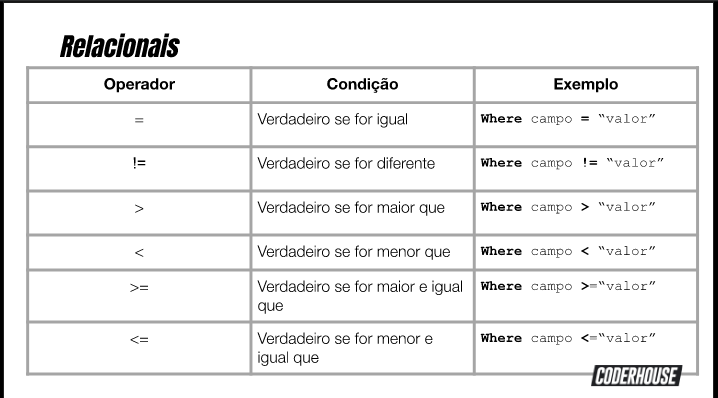

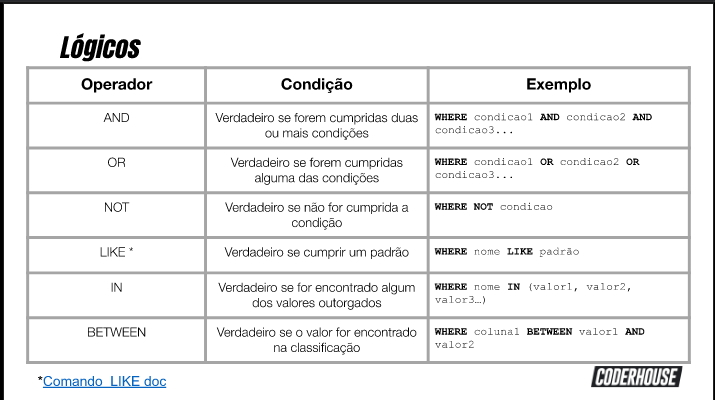

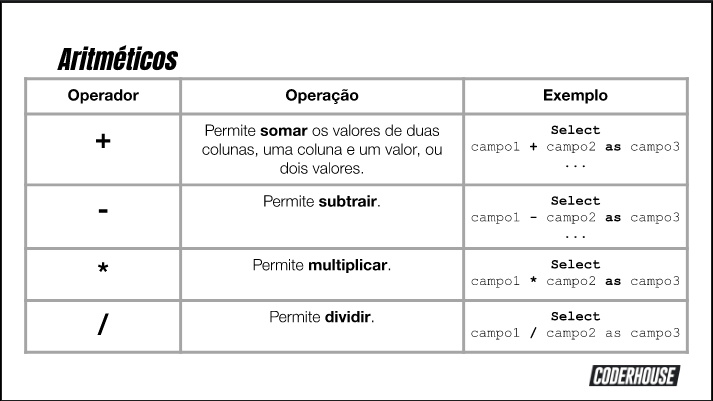

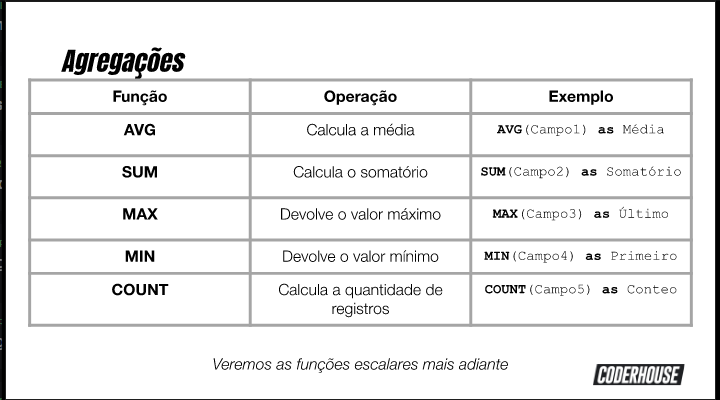

SQRT
--
Divisão - SQRT(9) >>> 3

POWER
--
Potência - POWER(X,N) >>> X^N

ABS
--
Absoluto - ABS(-10) >>> 10


SELECT - JOINS
--

  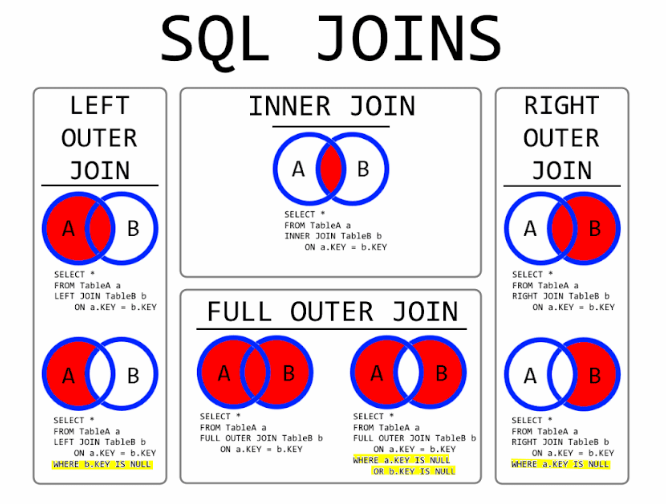

SEMI JOIN
--
Retorna os dados do INNER JOIN, porém de uma única tabela.

ANTI JOIN
--
É o mesmo que LEFT JOIN e RIGHT JOIN com WHERE B.KEY is NULL;

Não retorna a intersessão.